In [1]:
import pandas as pd
import numpy as np
from os import getcwd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import linregress
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv("../sales/data_values_clear/merge.csv", parse_dates=True)
data

,index,client_id,sex,user_birthday,binning_age,user_age,category_id,id_product,price,sell_date,transaction_date,sell_year,month,month_string,traceability_transaction
0,0,c_4410,f,1967,"(50.0, 60.0]",54,0,0_1455,8.99,2021-03-22 14:29:25.189266,2021-03-22,2021,3,Mars,1
1,1,c_4389,m,1984,"(30.0, 40.0]",37,0,0_1455,8.99,2021-07-09 11:16:18.579726,2021-07-09,2021,7,Juillet,1
2,2,c_5019,f,1977,"(40.0, 50.0]",45,0,0_1455,8.99,2022-01-15 00:01:53.456196,2022-01-15,2022,1,Janvier - 2022,1
3,3,c_7049,f,1987,"(30.0, 40.0]",34,0,0_1455,8.99,2021-03-04 14:01:38.698752,2021-03-04,2021,3,Mars,1
4,4,c_5110,f,1982,"(30.0, 40.0]",39,0,0_1455,8.99,2021-09-05 11:48:41.065009,2021-09-05,2021,9,Septembre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336708,336708,c_7135,m,1996,"(20.0, 30.0]",25,2,2_99,84.99,2021-07-11 20:56:49.820935,2021-07-11,2021,7,Juillet,1
336709,336709,c_5828,f,1998,"(20.0, 30.0]",23,2,2_99,84.99,2021-11-21 01:53:46.967570,2021-11-21,2021,11,Novembre,1
336710,336710,c_8260,m,1991,"(20.0, 30.0]",30,0,0_833,2.99,2021-09-27 23:22:40.394509,2021-09-27,2021,9,Septembre,1
336711,336711,c_8138,f,1984,"(30.0, 40.0]",37,0,0_394,2.14,2021-11-09 09:02:38.299240,2021-11-09,2021,11,Novembre,1


In [3]:
caGlobal = data.price.sum()
caGlobal

5796577.7700000005

In [4]:
cat0 = data.loc[data['category_id'] == 0]['price'].sum()
cat0

2229722.6500000004

In [5]:
meanCat0  = data.loc[data['category_id'] == 0]['price'].mean()
meanCat0

10.646828235271649

In [6]:
cat1 = data.loc[data['category_id'] == 1]['price'].sum()
cat1

2247384.4100000006

In [7]:
meanCat1  = data.loc[data['category_id'] == 1]['price'].mean()
meanCat1

20.48010580033718

In [8]:
cat2 = data.loc[data['category_id'] == 2]['price'].sum()
cat2

1319470.71

In [9]:
meanCat2  = data.loc[data['category_id'] == 2]['price'].mean()
meanCat2

75.1749492935278

## Repartition des catégories

In [10]:
catTransaction = data.groupby(['category_id']).sum().reset_index()[['category_id','traceability_transaction']]
catTransaction

,category_id,traceability_transaction
0,0,209426
1,1,109735
2,2,17552


In [11]:
sumTransaction = data['traceability_transaction'].sum()
sumTransaction

336713

<Figure size 720x720 with 0 Axes>

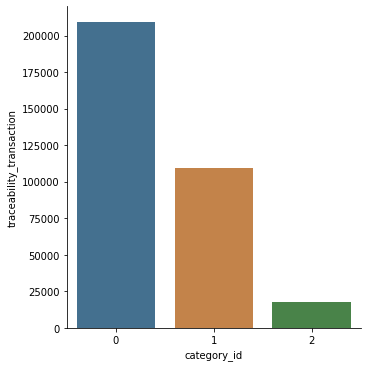

In [12]:
plt.figure(figsize=[10,10])
transacCategoryPlot = sns.catplot(x="category_id", y="traceability_transaction",
                data=catTransaction, saturation=.5,
                kind="bar", ci=None, aspect=1)


In [13]:
selectProductsByCategory = data.groupby(['category_id']).sum().reset_index()[['category_id','price']]
selectProductsByCategory

,category_id,price
0,0,2.229723e+06
1,1,2.247384e+06
2,2,1.319471e+06


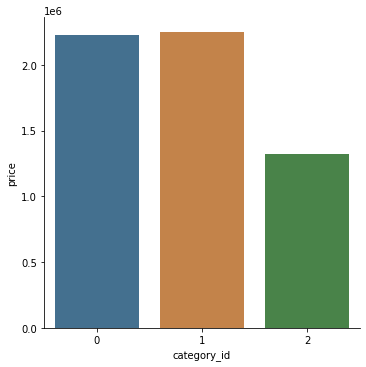

In [14]:
selectProductsByCategoryPlot = sns.catplot(x="category_id", y="price",
                data=selectProductsByCategory, saturation=.5,
                kind="bar", ci=None, aspect=1)

plt.savefig('../sales/plot/ca_cat_plot.png')

In [15]:
labelPie = ['category_0', 'category_1', 'category_2']
pieValues = [cat0,cat1,cat2]
colorsPie = ['mediumaquamarine','olivedrab','lime']

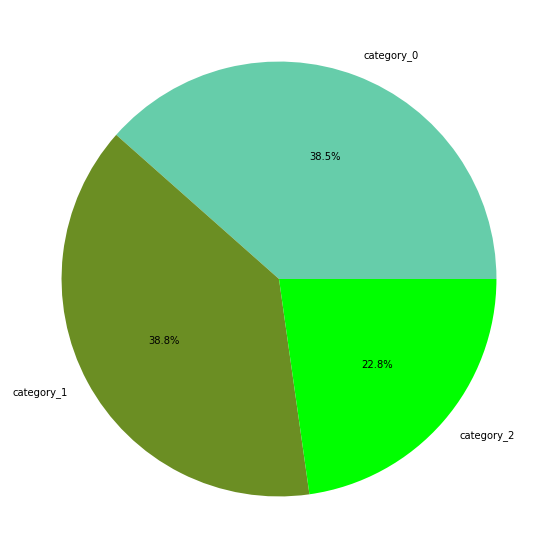

In [16]:
plt.figure(figsize=[10,10])
plt.pie(pieValues,labels=labelPie,autopct="%.1f%%",colors=colorsPie)
plt.savefig('../sales/plot/ca_cat_pie.png')

## CA Par mois 

In [17]:
monthCa = data.groupby(['month','month_string']).sum().reset_index()[['month','month_string','price']]
monthCa

,month,month_string,price
0,1,Janvier - 2022,522955.31
1,2,Fevrier - 2022,532740.88
2,3,Mars,479312.03
3,4,Avril,472980.72
4,5,Mai,489367.95
5,6,Juin,481257.94
6,7,Juillet,480898.66
7,8,Aout,479305.19
8,9,Septembre,502771.28
9,10,Octobre,319159.96


In [18]:
monthCaVerification = monthCa['price'].sum()
monthCaVerification

5796577.7699990105

ValueError: 'left' is not a valid value for which; supported values are 'major', 'minor', 'both'

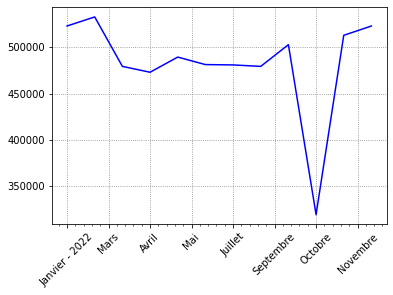

In [19]:
fig, ax = plt.subplots()
ax.grid(color='grey', linestyle='dotted')

# Plot
plt1 = ax.plot(monthCa['month_string'] ,monthCa['price'],color='blue', linestyle='solid',label='CA')

# x axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(12))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(48))
plt.xticks(rotation = 45)
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params('left')

#y axis
ax.set_ylabel('CA en €', color='b')
ax.yaxis.set_ticks_position('left')

# settings
plt.title("Evolution CZ")
#plt.savefig('../sales/plot/ca_global_zigzag.png')


In [ ]:
fig, ax = plt.subplots(figsize=[12,7])
plt.xticks(rotation = 45)
ax.xaxis.set_ticks_position('bottom')
sns.catplot(x="month_string", y="price", hue="month_string", kind="bar",ax=ax, data=monthCa, aspect=.8, height=15)

In [ ]:
ca = monthCa['price'].tolist()

In [ ]:
fig, ax = plt.subplots(figsize=[11,7])
bars = [0,1,2,3,4,5,6,7,8,9,10,11]
monthName = ['janv-2K22','fev-2K22','mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']
barWidth = 0.6
plotCa = plt.bar(bars, ca, color='turquoise', edgecolor='white', width=barWidth)
plt.title('CA')
plt.xticks(bars, monthName, rotation=90)

plt.savefig('../sales/plot/ca.png')

plotCa

In [ ]:
categoriesMonth = data.groupby(['month','category_id']).sum()['price'].reset_index()
moyenne = data['category_id'].sum().mean();
caCat0 = data[data['category_id'] == 0].groupby(['month']).sum()['price']
caCat1 = data[data['category_id'] == 1].groupby(['month']).sum()['price']
caCat2 = data[data['category_id'] == 2].groupby(['month']).sum()['price']

In [ ]:
caCat2.sum()

In [ ]:
fig, ax = plt.subplots(figsize=[9,5])

## on supperpose les catégorie (il faut prendre la diffenrence entre la categorie)
caSumCat = data[data['category_id'] != 2].groupby(['month']).sum()['price']

monthLine = [0,1,2,3,4,5,6,7,8,9,10,11]
month = ['mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']

barWidth = 0.7
postition0 = plt.bar(monthLine, caCat0, color='deeppink', edgecolor='white', width=barWidth)
postition1 = plt.bar(monthLine, caCat1, bottom=caCat0, color='lime', edgecolor='white', width=barWidth)
postition2 = plt.bar(monthLine, caCat2, bottom=caSumCat, color='royalblue', edgecolor='white', width=barWidth)

plt.xticks(monthLine, monthName, fontweight='bold', rotation=90)
plt.title('CA-catégories')
plt.legend((postition0[0],postition1[0], postition2[0]), ('category_0', 'category_1','category_2'), loc=[1.05,0.76])

plt.show()


## Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

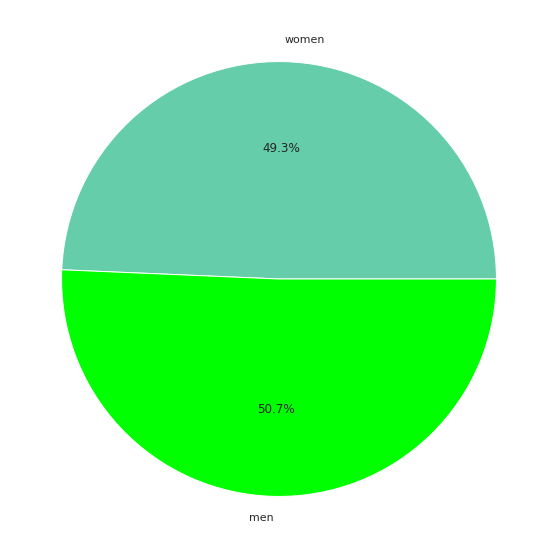

In [76]:
caWomen = data.loc[data['sex'] == 'f']['price'].sum()
caMen = data.loc[data['sex'] == 'm']['price'].sum()
labelPieSex = ['women', 'men']
pieValuesSex = [caWomen,caMen]
colorsPieSex = ['mediumaquamarine','lime']
plt.figure(figsize=[10,10])
plt.pie(pieValuesSex, labels = labelPieSex, autopct="%.1f%%", colors=colorsPieSex)
plt.savefig('../sales/plot/ca_sex_pie.png')

In [77]:
calculationSexUserByCategory = data.groupby(['sex', 'category_id','binning_age']).agg(['sum'])
catSexSpend = calculationSexUserByCategory['price'].reset_index();

In [78]:
cat0Women = catSexSpend[(catSexSpend['sex'] == 'f') & (catSexSpend['category_id'] == 0)].groupby(['binning_age']).sum()['sum']
cat1Women = catSexSpend[(catSexSpend['sex'] == 'f') & (catSexSpend['category_id'] == 1)].groupby(['binning_age']).sum()['sum']
cat2Women = catSexSpend[(catSexSpend['sex'] == 'f') & (catSexSpend['category_id'] == 2)].groupby(['binning_age']).sum()['sum']
cat0Men = catSexSpend[(catSexSpend['sex'] == 'm') & (catSexSpend['category_id'] == 0)].groupby(['binning_age']).sum()['sum']
cat1Men = catSexSpend[(catSexSpend['sex'] == 'm') & (catSexSpend['category_id'] == 1)].groupby(['binning_age']).sum()['sum']
cat2Men = catSexSpend[(catSexSpend['sex'] == 'm') & (catSexSpend['category_id'] == 2)].groupby(['binning_age']).sum()['sum']

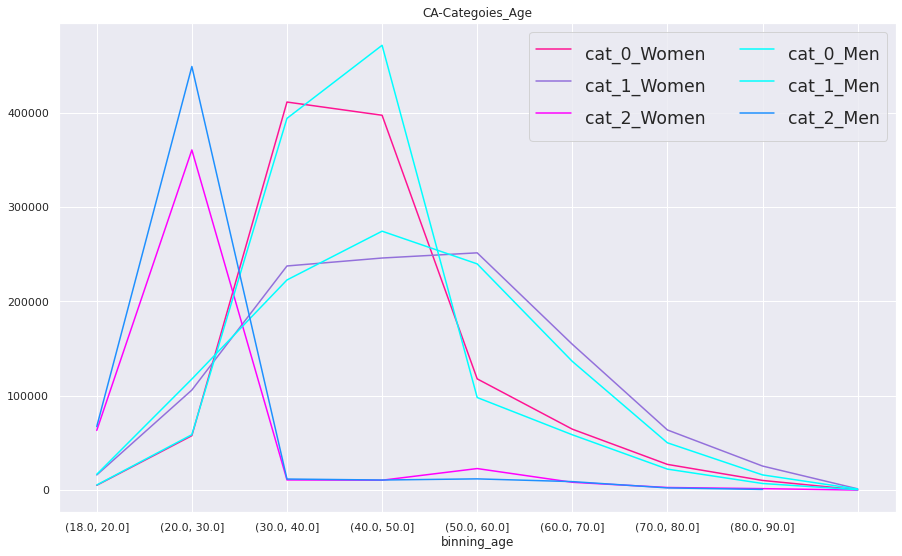

In [79]:
ax = plt.gca()
ax.figure.set_size_inches(15, 9)

bidding_name = ['18-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']

c0W = cat0Women.plot(kind='line', x=bidding_name, y=cat0Women,color='deeppink', ax=ax, label='cat_0_Women')
c1W = cat1Women.plot(kind='line', x=bidding_name, y=cat1Women,color='mediumpurple', ax=ax, label='cat_1_Women')
c2W = cat2Women.plot(kind='line', x=bidding_name, y=cat2Women,color='magenta', ax=ax, label='cat_2_Women')

c0M = cat0Men.plot(kind='line', x=bidding_name, y=cat0Men,color='aqua', ax=ax, label='cat_0_Men')
c1M = cat1Men.plot(kind='line', x=bidding_name, y=cat1Men,color='cyan', ax=ax, label='cat_1_Men')
c2M = cat2Men.plot(kind='line', x=bidding_name, y=cat2Men,color='dodgerblue', ax=ax, label='cat_2_Men')


plt.legend(fontsize='x-large', ncol=2,handleheight=2.4, labelspacing=0.05)
plt.title('CA-Categoies_Age')



plt.show()

##  Y a-t-il une corrélation entre l'âge et montant total des transactions

In [80]:
binningAge = data.groupby(['binning_age']).agg(sum)
binningAgeResetIndex = binningAge.reset_index()
resultBinningAge = binningAgeResetIndex[['binning_age','price']]

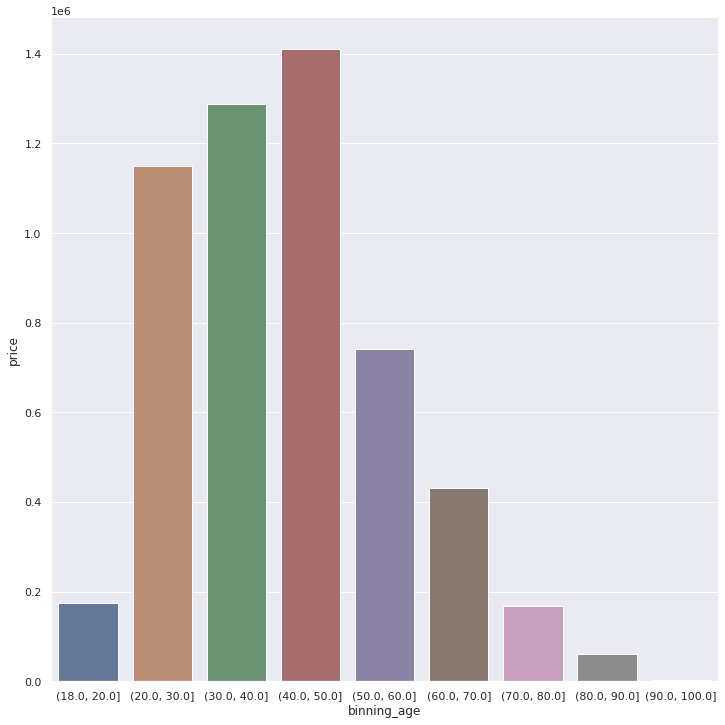

In [81]:
agePrice = sns.catplot(x="binning_age", y="price",
                data=resultBinningAge, saturation=.5,
                kind="bar",height=10, ci=None, aspect=1)

## Y a-t-il une corrélation entre l'âge et la fréquence d'achat sur un mois 

In [82]:
detectMostTransaction = data.groupby('month').sum()['traceability_transaction'].reset_index()
detectMostTransaction.sort_values(by='traceability_transaction', ascending=False)

,month,traceability_transaction
8,9,33254
11,12,32417
1,2,29556
0,1,29311
2,3,28559
3,4,28401
10,11,28267
4,5,28237
5,6,26812
7,8,25610


In [83]:
september = data.loc[data['month'] == 9].reset_index();
septemberBydate = september.groupby('transaction_date').sum()['price'].reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

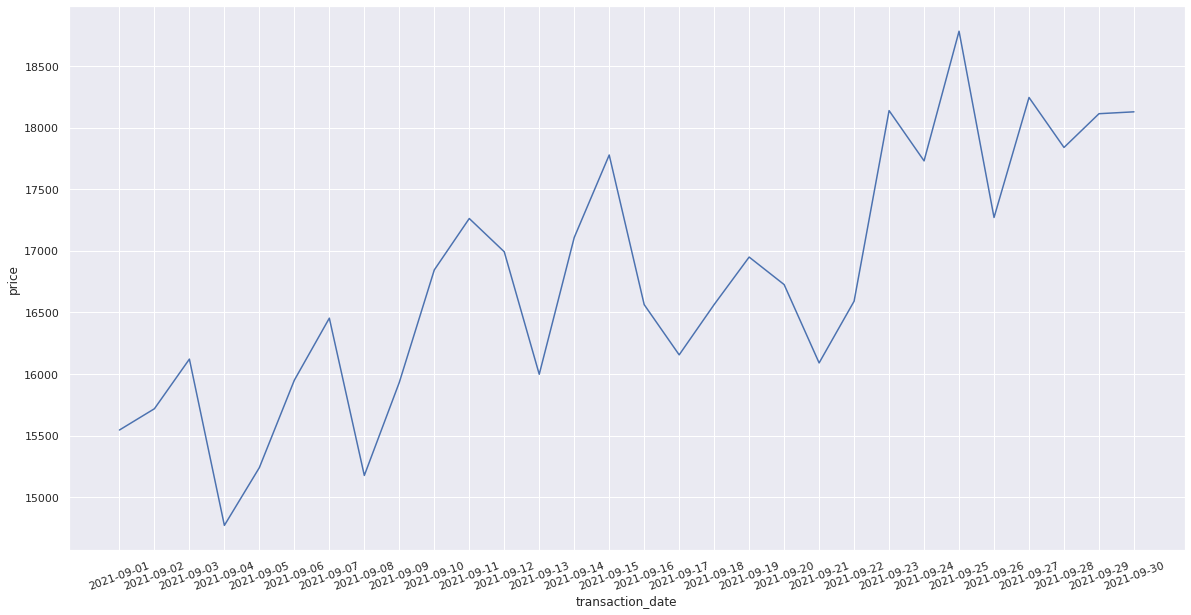

In [84]:
fig, ax = plt.subplots(figsize=[20,10])
sns.lineplot(x="transaction_date", y="price",data=septemberBydate)
plt.xticks(rotation=20)

## on constate sur un mois de septembre qui il y a des chute de ventes tous les 3 jours 

In [ ]:
septemberBydateByAAge = september.groupby(['transaction_date','binning_age']).sum()['price'].reset_index()
septemberBydateByAAge

In [ ]:
sTranBinning = september.groupby(['transaction_date','binning_age']).sum()['traceability_transaction'].reset_index()
sTranBinning

In [ ]:
uniqueDate = pd.unique(sTranBinning['transaction_date'])
plt.figure(figsize=(10,25))

for items in range (0, len(uniqueDate)):
    x = sTranBinning.loc[sTranBinning['transaction_date'] == uniqueDate[items]]
    plt.subplot(6,5,items+1)
    plt.bar(x.binning_age,x.traceability_transaction)
    plt.gcf().subplots_adjust(wspace  = 1, hspace=1)
   

## La taille du panier moyen (en nombre d’articles)

In [25]:
data

,index,client_id,sex,user_birthday,binning_age,user_age,category_id,id_product,price,sell_date,transaction_date,sell_year,month,month_string,traceability_transaction
0,0,c_4410,f,1967,"(50.0, 60.0]",54,0,0_1455,8.99,2021-03-22 14:29:25.189266,2021-03-22,2021,3,Mars,1
1,1,c_4389,m,1984,"(30.0, 40.0]",37,0,0_1455,8.99,2021-07-09 11:16:18.579726,2021-07-09,2021,7,Juillet,1
2,2,c_5019,f,1977,"(40.0, 50.0]",45,0,0_1455,8.99,2022-01-15 00:01:53.456196,2022-01-15,2022,1,Janvier - 2022,1
3,3,c_7049,f,1987,"(30.0, 40.0]",34,0,0_1455,8.99,2021-03-04 14:01:38.698752,2021-03-04,2021,3,Mars,1
4,4,c_5110,f,1982,"(30.0, 40.0]",39,0,0_1455,8.99,2021-09-05 11:48:41.065009,2021-09-05,2021,9,Septembre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336708,336708,c_7135,m,1996,"(20.0, 30.0]",25,2,2_99,84.99,2021-07-11 20:56:49.820935,2021-07-11,2021,7,Juillet,1
336709,336709,c_5828,f,1998,"(20.0, 30.0]",23,2,2_99,84.99,2021-11-21 01:53:46.967570,2021-11-21,2021,11,Novembre,1
336710,336710,c_8260,m,1991,"(20.0, 30.0]",30,0,0_833,2.99,2021-09-27 23:22:40.394509,2021-09-27,2021,9,Septembre,1
336711,336711,c_8138,f,1984,"(30.0, 40.0]",37,0,0_394,2.14,2021-11-09 09:02:38.299240,2021-11-09,2021,11,Novembre,1


In [35]:
meanByUserAge = data.groupby(['binning_age']).mean()
meanByUserAge = meanByUserAge.reset_index()
meanByUserAge = meanByUserAge[['binning_age','price']] 
meanByUserAge
#sns.histplot(data=calc_panier_moy, x="user_age", bins=30)

,binning_age,price
0,"(18.0, 20.0]",40.652039
1,"(20.0, 30.0]",35.186024
2,"(30.0, 40.0]",13.097370
3,"(40.0, 50.0]",13.123518
4,"(50.0, 60.0]",16.589580
5,"(60.0, 70.0]",16.595203
6,"(70.0, 80.0]",16.472579
7,"(80.0, 90.0]",16.706574
8,"(90.0, 100.0]",16.490561


In [36]:
sumByUserAge = data.groupby(['binning_age']).sum()
sumByUserAge = sumByUserAge.reset_index()
sumByUserAge = sumByUserAge[['binning_age','traceability_transaction']] 
sumByUserAge

,binning_age,traceability_transaction
0,"(18.0, 20.0]",4282
1,"(20.0, 30.0]",32669
2,"(30.0, 40.0]",98329
3,"(40.0, 50.0]",107439
4,"(50.0, 60.0]",44726
5,"(60.0, 70.0]",26010
6,"(70.0, 80.0]",10242
7,"(80.0, 90.0]",3675
8,"(90.0, 100.0]",214


In [38]:
mergeTransacMeanPrice = meanByUserAge.merge(sumByUserAge, left_on='binning_age', right_on='binning_age')
mergeTransacMeanPrice

,binning_age,price,traceability_transaction
0,"(18.0, 20.0]",40.652039,4282
1,"(20.0, 30.0]",35.186024,32669
2,"(30.0, 40.0]",13.097370,98329
3,"(40.0, 50.0]",13.123518,107439
4,"(50.0, 60.0]",16.589580,44726
5,"(60.0, 70.0]",16.595203,26010
6,"(70.0, 80.0]",16.472579,10242
7,"(80.0, 90.0]",16.706574,3675
8,"(90.0, 100.0]",16.490561,214


<AxesSubplot:xlabel='binning_age', ylabel='price'>

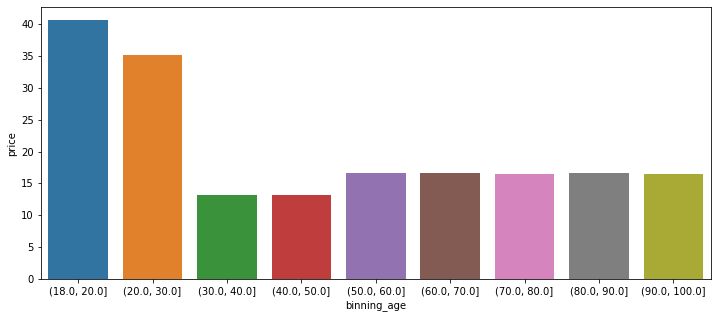

In [43]:
plt.figure(figsize=[12,5])
sns.barplot(x="binning_age", y="price", data=mergeTransacMeanPrice, ci=68)

<AxesSubplot:xlabel='user_age', ylabel='Count'>

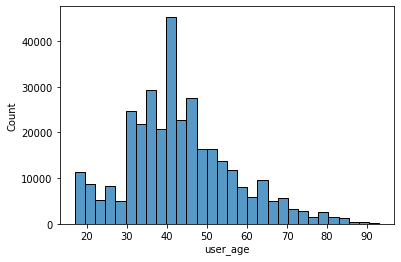

In [28]:
userAGETRANSAC = data[['user_age','traceability_transaction']]

sns.histplot(data=userAGETRANSAC, x="user_age", bins=30)

## ici faire par catégorie 

## Les catégories de produits achetés.

In [ ]:
binningCategory = data.groupby(['binning_age','category_id']).sum()
binningCategory
binningCategory = binningCategory[['price']].reset_index()

In [ ]:
binning_cat_plot = sns.factorplot(x='binning_age', y='price', hue='category_id', 
                        col='category_id', data=binningCategory.reset_index(), kind='bar',height=10)

## Régression linéaire Panier moyen

expliquation que de 0.30 des datas 


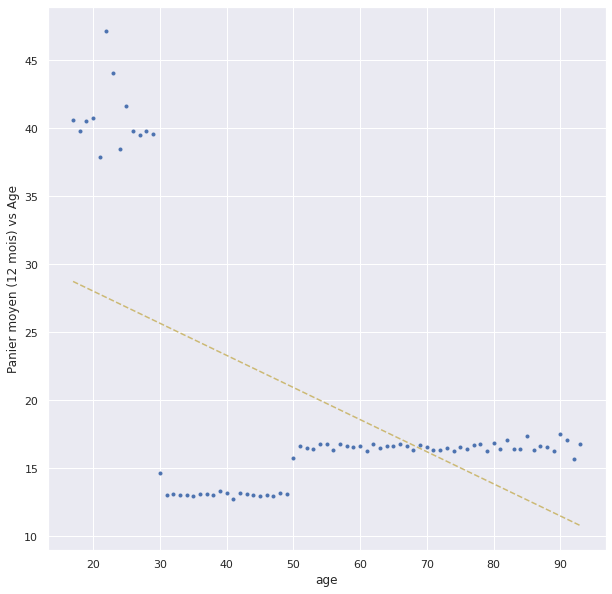

In [75]:
from sklearn.linear_model import LinearRegression

meanByAge = data.groupby(['user_age']).mean()
meanByAge = meanByAge.reset_index()
meanByAge = meanByAge[['user_age','price']] 

X = meanByAge['user_age'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = meanByAge['price'].values

modelLinearPanierMoyAge = LinearRegression()
modelLinearPanierMoyAge.fit(X, y)

RCarre = modelLinearPanierMoyAge.score(X, y)

sns.set_theme()
sns.set_style("darkgrid")


#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(10,10))
plt.plot(X, y, '.')
plt.plot(X, model2.predict(X), 'y--')
plt.xlabel('age')
plt.ylabel("Panier moyen (12 mois) vs Age")
plt.plot()
print(f"expliquation que de {RCarre:.2f} des datas ")


In [99]:
##
frequence d'achat = nombre d'acheteur / nombre de transaction 

depense sur l'anner = group by age + sum


SyntaxError: invalid syntax (<ipython-input-99-a812d0cca809>, line 2)

In [85]:
data

,index,client_id,sex,user_birthday,binning_age,user_age,category_id,id_product,price,sell_date,transaction_date,sell_year,month,month_string,traceability_transaction
0,0,c_4410,f,1967,"(50.0, 60.0]",54,0,0_1455,8.99,2021-03-22 14:29:25.189266,2021-03-22,2021,3,Mars,1
1,1,c_4389,m,1984,"(30.0, 40.0]",37,0,0_1455,8.99,2021-07-09 11:16:18.579726,2021-07-09,2021,7,Juillet,1
2,2,c_5019,f,1977,"(40.0, 50.0]",45,0,0_1455,8.99,2022-01-15 00:01:53.456196,2022-01-15,2022,1,Janvier - 2022,1
3,3,c_7049,f,1987,"(30.0, 40.0]",34,0,0_1455,8.99,2021-03-04 14:01:38.698752,2021-03-04,2021,3,Mars,1
4,4,c_5110,f,1982,"(30.0, 40.0]",39,0,0_1455,8.99,2021-09-05 11:48:41.065009,2021-09-05,2021,9,Septembre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336708,336708,c_7135,m,1996,"(20.0, 30.0]",25,2,2_99,84.99,2021-07-11 20:56:49.820935,2021-07-11,2021,7,Juillet,1
336709,336709,c_5828,f,1998,"(20.0, 30.0]",23,2,2_99,84.99,2021-11-21 01:53:46.967570,2021-11-21,2021,11,Novembre,1
336710,336710,c_8260,m,1991,"(20.0, 30.0]",30,0,0_833,2.99,2021-09-27 23:22:40.394509,2021-09-27,2021,9,Septembre,1
336711,336711,c_8138,f,1984,"(30.0, 40.0]",37,0,0_394,2.14,2021-11-09 09:02:38.299240,2021-11-09,2021,11,Novembre,1


In [117]:
t = data.groupby(['category_id','binning_age']).size()
t.reset_index()

,category_id,binning_age,0
0,0,"(18.0, 20.0]",965
1,0,"(20.0, 30.0]",10940
2,0,"(30.0, 40.0]",75499
3,0,"(40.0, 50.0]",81750
4,0,"(50.0, 60.0]",20300
5,0,"(60.0, 70.0]",11593
6,0,"(70.0, 80.0]",4595
7,0,"(80.0, 90.0]",1621
8,0,"(90.0, 100.0]",85
9,1,"(18.0, 20.0]",1596


In [113]:
d = data[['category_id','binning_age']]

d = d["category_id"].astype("category")



d

sns.boxplot(x="binning_age", y="category_id", data=d)

0         0
1         0
2         0
3         0
4         0
         ..
336708    2
336709    2
336710    0
336711    0
336712    0
Name: category_id, Length: 336713, dtype: category
Categories (3, int64): [0, 1, 2]